In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadr
import os
import numpy as np

In [58]:
def load_rda(file_paths):

  dataframes = {}

  for file_path in file_paths:
      result = pyreadr.read_r(file_path)

      for key in result.keys():
          dataframes[key] = result[key]

  return dataframes

In [59]:
def missing_values(df):
  return(df.isnull().sum())

In [60]:
import pandas as pd

def outlier_values(df):
    outliers = pd.Series(dtype="float64")

    for col in df.select_dtypes(include=["number"]):  
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = mask.mean() * 100  
    return outliers


In [63]:
def clean_data(data_dict):
    cleaned_dict = {}
    for key, df in data_dict.items():
        df_cleaned = df.drop_duplicates()
        if 'RecordBeg' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordBeg'] = pd.to_datetime(df_cleaned['RecordBeg'], errors='coerce')
        if 'RecordEnd' in df_cleaned.columns:
            df_cleaned.loc[:, 'RecordEnd'] = pd.to_datetime(df_cleaned['RecordEnd'], errors='coerce')

        cleaned_dict[key] = df_cleaned

    return cleaned_dict

## freMTPL

In [4]:
import os
import pandas as pd

# Charger les fichiers CSV
df_freq = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/raw_data/freMTPLfreq.csv")
df_sev = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/raw_data/freMTPLsev.csv")

# Fusionner les deux bases sur 'PolicyID'
freMTPL1 = pd.merge(df_freq, df_sev, on="PolicyID", how="inner")  # Fusion par PolicyID

# Vérifier si le dossier raw_data existe, sinon le créer
output_dir = "raw_data"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder la base fusionnée dans raw_data
output_path = os.path.join(output_dir, "freMTPL1.csv")
freMTPL1.to_csv(output_path, index=False)

print(f"Base fusionnée enregistrée sous : {output_path}")


Base fusionnée enregistrée sous : raw_data/freMTPL1.csv


In [3]:
import os
import pandas as pd

# Charger les fichiers CSV
df_freq = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/raw_data/freMTPL2freq.csv")
df_sev = pd.read_csv("/home/onyxia/work/Federated_Learning_Milliman/raw_data/freMTPL2sev.csv")

# Fusionner les deux bases sur 'IDpol'
freMTPL2 = pd.merge(df_freq, df_sev, on="IDpol", how="inner")  # Fusion par IDpol

# Vérifier si le dossier raw_data existe, sinon le créer
output_dir = "raw_data"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder la base fusionnée dans raw_data
output_path = os.path.join(output_dir, "freMTPL2.csv")
freMTPL2.to_csv(output_path, index=False)

print(f"Base fusionnée enregistrée sous : {output_path}")


Base fusionnée enregistrée sous : raw_data/freMTPL2.csv


In [5]:
df_freMTPL1 = pd.read_csv("freMTPL1.csv")
df_freMTPL2 = pd.read_csv("freMTPL2.csv")
# Afficher les premières lignes
print(df_freMTPL1.head())
print(df_freMTPL2.head())


   PolicyID  ClaimAmount  ClaimNb  Exposure Power  CarAge  DriverAge  \
0        33          302        1      0.75     g       1         61   
1        41         2001        1      0.14     l       5         50   
2        92         1449        1      0.14     d       0         36   
3        96         9924        2      0.62     j       0         51   
4        96          946        2      0.62     j       0         51   

                                Brand      Gas           Region  Density  
0  Japanese (except Nissan) or Korean  Regular    Ile-de-France    27000  
1  Japanese (except Nissan) or Korean   Diesel  Basse-Normandie       56  
2  Japanese (except Nissan) or Korean  Regular    Ile-de-France     4792  
3  Japanese (except Nissan) or Korean  Regular    Ile-de-France    27000  
4  Japanese (except Nissan) or Korean  Regular    Ile-de-France    27000  
   IDpol  ClaimAmount  ClaimNb  Exposure  VehPower  VehAge  DrivAge  \
0    139       303.00        1      0.75      

In [6]:
print(df_freMTPL1.columns)
print(df_freMTPL2.columns)

Index(['PolicyID', 'ClaimAmount', 'ClaimNb', 'Exposure', 'Power', 'CarAge',
       'DriverAge', 'Brand', 'Gas', 'Region', 'Density'],
      dtype='object')
Index(['IDpol', 'ClaimAmount', 'ClaimNb', 'Exposure', 'VehPower', 'VehAge',
       'DrivAge', 'BonusMalus', 'VehBrand', 'VehGas', 'Area', 'Density',
       'Region'],
      dtype='object')


In [ ]:
# Renommer les colonnes pour df_freMTPL1
df_freMTPL1 = df_freMTPL1.rename(columns={
    "PolicyID": "IdPolicy",
    "Power": "power",
    "CarAge": "CarAge",
    "DriverAge": "DriverAge",
    "Brand": "CarBrand",
    "Gas": "CarGas"
})

# Renommer les colonnes pour df_freMTPL2
df_freMTPL2 = df_freMTPL2.rename(columns={
    "IDpol": "IdPolicy",
    "VehPower": "power",
    "VehAge": "CarAge",
    "DrivAge": "DriverAge",
    "VehBrand": "CarBrand",
    "VehGas": "CarGas"
})

# Supprimer les colonnes BonusMalus et Area de df_freMTPL2
df_freMTPL2 = df_freMTPL2.drop(columns=["BonusMalus", "Area"])

# Réorganiser les colonnes dans le même ordre
columns_order = ["IdPolicy", "ClaimAmount", "ClaimNb", "Exposure", "power", "CarAge", 
                 "DriverAge", "CarBrand", "CarGas", "Region", "Density"]

df_freMTPL1 = df_freMTPL1[columns_order]
df_freMTPL2 = df_freMTPL2[columns_order]


KeyError: "['BonusMalus', 'Area'] not found in axis"

In [13]:
df_freMTPL1

,IdPolicy,ClaimAmount,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density
0,33,302,1,0.75,43,1,61,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000
1,41,2001,1,0.14,66,5,50,Japanese (except Nissan) or Korean,Diesel,Basse-Normandie,56
2,92,1449,1,0.14,10,0,36,Japanese (except Nissan) or Korean,Regular,Ile-de-France,4792
3,96,9924,2,0.62,56,0,51,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000
4,96,946,2,0.62,56,0,51,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000
...,...,...,...,...,...,...,...,...,...,...,...
16176,412270,1364,1,0.36,43,1,53,Japanese (except Nissan) or Korean,Diesel,Nord-Pas-de-Calais,4540
16177,412664,7603,1,0.22,50,0,34,Japanese (except Nissan) or Korean,Regular,Ile-de-France,6570
16178,412926,1751,1,0.14,43,2,51,Japanese (except Nissan) or Korean,Diesel,Aquitaine,178
16179,412944,2009,2,0.17,120,3,36,Japanese (except Nissan) or Korean,Regular,Poitou-Charentes,181


count    1.618100e+04
mean     2.129972e+03
std      2.106364e+04
min      2.000000e+00
25%      6.980000e+02
50%      1.156000e+03
75%      1.243000e+03
max      2.036833e+06
Name: ClaimAmount, dtype: float64


In [12]:
# Mapping des lettres vers des valeurs numériques proches de la stat desc
letter_to_power = {
    'd': 10, 'e': 30, 'f': 40, 'g': 43, 'h': 50, 'i': 53,
    'j': 56, 'k': 60, 'l': 66, 'm': 80, 'n': 100, 'o': 120
}

# Transformation de la colonne 'Power' dans df_freMTPL1
df_freMTPL1['power'] = df_freMTPL1['power'].map(letter_to_power)

# Vérification des stats descriptives après conversion
print(df_freMTPL1['power'].describe())

count    16181.000000
mean        37.582968
std         15.150534
min         10.000000
25%         30.000000
50%         40.000000
75%         43.000000
max        120.000000
Name: power, dtype: float64


In [10]:
df_freMTPL2

,IdPolicy,ClaimAmount,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density
0,139,303.00,1,0.75,7,1,61,B12,Regular,Ile-de-France,27000
1,190,1981.84,1,0.14,12,5,50,B12,Diesel,Basse-Normandie,56
2,414,1456.55,1,0.14,4,0,36,B12,Regular,Ile-de-France,4792
3,424,9844.36,2,0.62,10,0,51,B12,Regular,Ile-de-France,27000
4,424,989.64,2,0.62,10,0,51,B12,Regular,Ile-de-France,27000
...,...,...,...,...,...,...,...,...,...,...,...
26439,6113793,1769.88,1,0.14,7,2,51,B12,Diesel,Aquitaine,178
26440,6113817,1288.28,1,0.17,4,0,35,B12,Regular,Rhone-Alpes,1719
26441,6113834,1940.40,2,0.17,15,3,36,B12,Regular,Poitou-Charentes,181
26442,6113834,10290.00,2,0.17,15,3,36,B12,Regular,Poitou-Charentes,181


In [ ]:
#Fusion verticale des bases
df_freMTPL = pd.concat([df_freMTPL1, df_freMTPL2], ignore_index=True)

# Vérification de la fusion
print(df_freMTPL.shape)  # Vérifie le nombre total de lignes et de colonnes
print(df_freMTPL.head())  # Affiche les premières lignes du DataFrame final




(42625, 11)
   IdPolicy  ClaimAmount  ClaimNb  Exposure  power  CarAge  DriverAge  \
0        33        302.0        1      0.75     43       1         61   
1        41       2001.0        1      0.14     66       5         50   
2        92       1449.0        1      0.14     10       0         36   
3        96       9924.0        2      0.62     56       0         51   
4        96        946.0        2      0.62     56       0         51   

                             CarBrand   CarGas           Region  Density  
0  Japanese (except Nissan) or Korean  Regular    Ile-de-France    27000  
1  Japanese (except Nissan) or Korean   Diesel  Basse-Normandie       56  
2  Japanese (except Nissan) or Korean  Regular    Ile-de-France     4792  
3  Japanese (except Nissan) or Korean  Regular    Ile-de-France    27000  
4  Japanese (except Nissan) or Korean  Regular    Ile-de-France    27000  


In [22]:
import numpy as np
np.random.seed(42)
df_freMTPL['Sex'] = np.random.choice([0, 1], size=len(df_freMTPL), p=[0.4, 0.6])

In [23]:
print(df_freMTPL['ClaimAmount'].describe())

count    4.262500e+04
mean     2.214060e+03
std      2.652541e+04
min      1.000000e+00
25%      6.890000e+02
50%      1.165000e+03
75%      1.237000e+03
max      4.075401e+06
Name: ClaimAmount, dtype: float64


In [35]:
df_freMTPL

,IdPolicy,ClaimAmount,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density,Sex
0,33,302.00,1,0.75,43,1,61,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,0
1,41,2001.00,1,0.14,66,5,50,Japanese (except Nissan) or Korean,Diesel,Basse-Normandie,56,1
2,92,1449.00,1,0.14,10,0,36,Japanese (except Nissan) or Korean,Regular,Ile-de-France,4792,1
3,96,9924.00,2,0.62,56,0,51,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,1
4,96,946.00,2,0.62,56,0,51,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42620,6113793,1769.88,1,0.14,7,2,51,B12,Diesel,Aquitaine,178,1
42621,6113817,1288.28,1,0.17,4,0,35,B12,Regular,Rhone-Alpes,1719,1
42622,6113834,1940.40,2,0.17,15,3,36,B12,Regular,Poitou-Charentes,181,0
42623,6113834,10290.00,2,0.17,15,3,36,B12,Regular,Poitou-Charentes,181,1


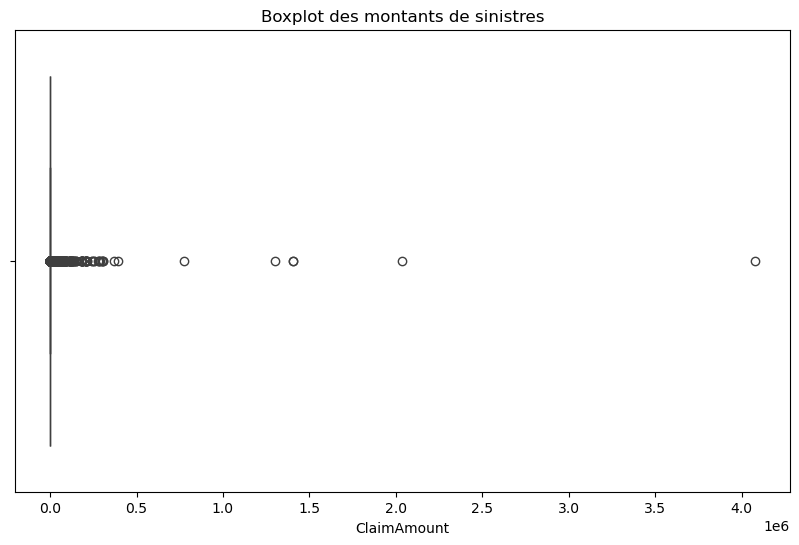

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot pour visualiser les valeurs aberrantes
plt.figure(figsize=(10,6))
sns.boxplot(x=df_freMTPL["ClaimAmount"])
plt.title('Boxplot des montants de sinistres')
plt.show()


In [37]:
import numpy as np

# Calcul des quartiles et de l'IQR
Q1 = df_freMTPL["ClaimAmount"].quantile(0.25)
Q3 = df_freMTPL["ClaimAmount"].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes des valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcul de la médiane
median_value = df_freMTPL["ClaimAmount"].median()

# Imputation des valeurs aberrantes par la médiane
df_freMTPL.loc[
    (df_freMTPL["ClaimAmount"] < lower_bound) | (df_freMTPL["ClaimAmount"] > upper_bound),
    "ClaimAmount"
] = median_value

# Vérification après imputation
print(df_freMTPL["ClaimAmount"].describe())

count    42625.000000
mean       972.481265
std        429.458657
min          1.000000
25%        689.000000
50%       1165.000000
75%       1204.000000
max       2059.000000
Name: ClaimAmount, dtype: float64


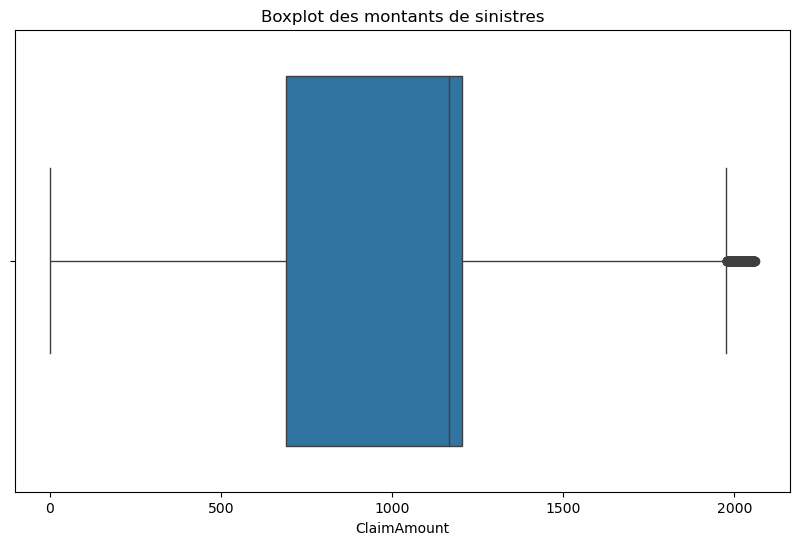

In [38]:

# Boxplot pour visualiser les valeurs aberrantes
plt.figure(figsize=(10,6))
sns.boxplot(x=df_freMTPL["ClaimAmount"])
plt.title('Boxplot des montants de sinistres')
plt.show()


In [40]:
import jenkspy
import numpy as np

# Extraction des valeurs
claim_amounts_clean = df_freMTPL["ClaimAmount"].values

# Jenks avec 2 classes (ne pas utiliser de nom d'argument !)
breaks = jenkspy.jenks_breaks(claim_amounts_clean, 2)

# Seuil = 2ème point de coupure (le 1er est min)
seuil_jenks = breaks[1]

# Création de la variable Sinistre
df_freMTPL["Sinistre"] = np.where(df_freMTPL["ClaimAmount"] >= seuil_jenks, 1, 0)

# Affichage
print(df_freMTPL["Sinistre"].value_counts())
print(f"Seuil déterminé par Jenks : {seuil_jenks:.2f}")


Sinistre
1    31270
0    11355
Name: count, dtype: int64
Seuil déterminé par Jenks : 770.54


In [41]:
df_freMTPL

,IdPolicy,ClaimAmount,ClaimNb,Exposure,power,CarAge,DriverAge,CarBrand,CarGas,Region,Density,Sex,Sinistre
0,33,302.00,1,0.75,43,1,61,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,0,0
1,41,2001.00,1,0.14,66,5,50,Japanese (except Nissan) or Korean,Diesel,Basse-Normandie,56,1,1
2,92,1449.00,1,0.14,10,0,36,Japanese (except Nissan) or Korean,Regular,Ile-de-France,4792,1,1
3,96,1165.00,2,0.62,56,0,51,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,1,1
4,96,946.00,2,0.62,56,0,51,Japanese (except Nissan) or Korean,Regular,Ile-de-France,27000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42620,6113793,1769.88,1,0.14,7,2,51,B12,Diesel,Aquitaine,178,1,1
42621,6113817,1288.28,1,0.17,4,0,35,B12,Regular,Rhone-Alpes,1719,1,1
42622,6113834,1940.40,2,0.17,15,3,36,B12,Regular,Poitou-Charentes,181,0,1
42623,6113834,1165.00,2,0.17,15,3,36,B12,Regular,Poitou-Charentes,181,1,1


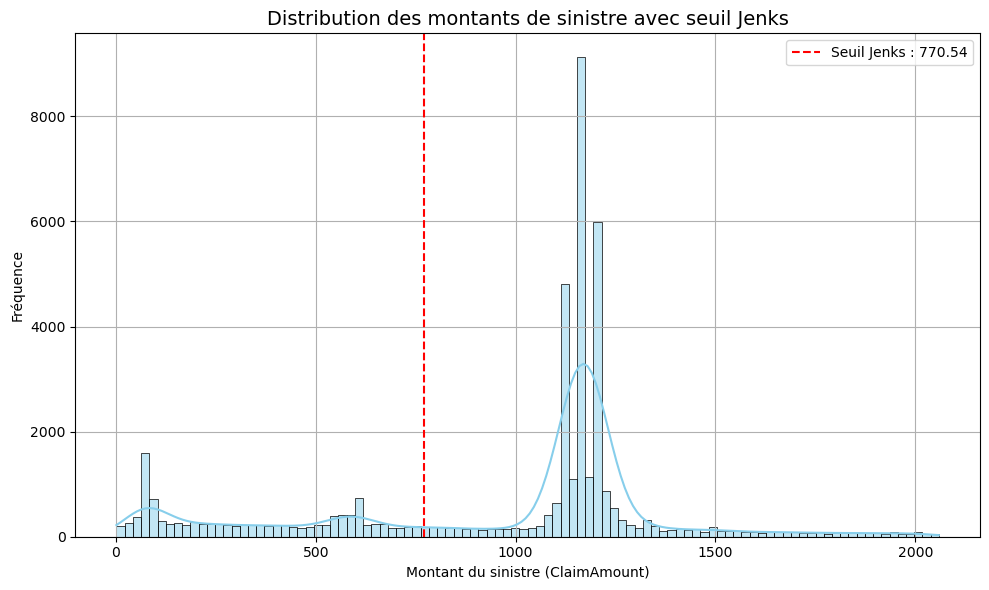

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille de l'image
plt.figure(figsize=(10, 6))

# Histogramme de ClaimAmount
sns.histplot(df_freMTPL["ClaimAmount"], bins=100, kde=True, color="skyblue")

# Ajout du seuil Jenks
plt.axvline(seuil_jenks, color='red', linestyle='--', label=f'Seuil Jenks : {seuil_jenks:.2f}')

# Titres et légendes
plt.title("Distribution des montants de sinistre avec seuil Jenks", fontsize=14)
plt.xlabel("Montant du sinistre (ClaimAmount)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [44]:
# Vérifier si le dossier raw_data existe, sinon le créer
output_dir = "/home/onyxia/work/Federated_Learning_Milliman/data"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder la base fusionnée dans raw_data
output_path = os.path.join(output_dir, "french_data.csv")
df_freMTPL.to_csv(output_path, index=False)